In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pos-salary/Position_Salaries.csv


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
dataset = pd.read_csv("/kaggle/input/pos-salary/Position_Salaries.csv")
x= dataset.iloc[:, 1:-1].values
y= dataset.iloc[:, -1].values

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)


LinearRegression()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

# Visulaizing linear regression results

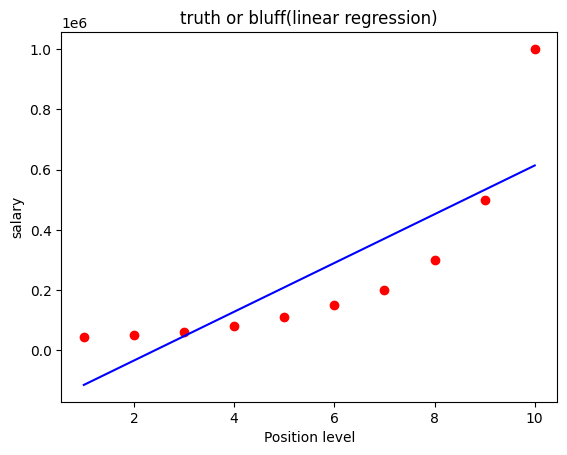

In [21]:
plt.scatter(x,y,color='red')  #red points are data points
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('truth or bluff(linear regression)')
plt.xlabel('Position level')
plt.ylabel('salary')
plt.show()

# Visualizing polynomial regression results

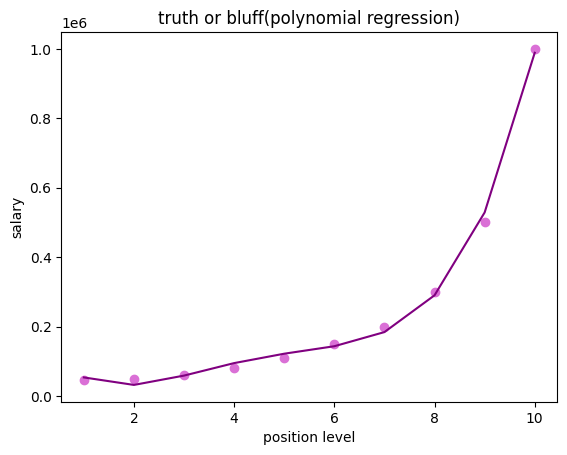

In [22]:
plt.scatter(x,y,color='orchid')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)),color='purple')
plt.title('truth or bluff(polynomial regression)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import numpy as np
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x))


mae=mean_absolute_error(y,y_pred)  #mse
mse=mean_squared_error(y,y_pred)  #rmse ->we used this because new versions of sckicit learn do not accept squared as an argument

rmse=np.sqrt(mse)

r2=r2_score(y,y_pred)

print("MAE:",mae)
print("rmse",rmse)
print("r2 score",r2)

MAE: 12681.818181828514
rmse 14503.234909626777
r2 score 0.9973922891706614


In [27]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

for degree in range(1, 7):   # try degree 1 to 6
    
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)

    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)

    y_pred = lin_reg.predict(x_poly)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"Degree {degree} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")